# Decision Tree

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
nltk.download('stopwords') # Download Stopwords from nltk library
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## Importing the Dataset

In [2]:
# Dataset is tab separated values and has quotation marks in features...
df = pd.read_csv('../dataset/Restaurant_Reviews.tsv', delimiter='\t', quoting=3) # Ignore quote marks
print(df.shape)
df.head()

(1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# Checking if there are any null or NaN values in the dataset
print(df.isna().values.any())
print(df.isnull().values.any())

False
False


## Cleaning the Dataset

In [4]:
# Initiate an empty list for the clean reviews
clean_reviews = []
# Loop through the reviews in the dataset and clean them
for i in range(len(df)):
    # Replace special characters with spaces (except for apostrophe)
    review = re.sub("[^a-zA-Z']", ' ', df['Review'][i])
    # Convert to lower case
    review = review.lower()
    # Split review into words
    review = review.split()
    # Remove wanted stopwords from stopwords list
    wanted_words = ["wouldn't", "isn't", "not", "shouldn't", "weren't", "should", "didn't", "wasn't", "couldn't", "don't", "won't"]
    all_stopwords = stopwords.words('english')
    for stp in wanted_words:
        all_stopwords.remove(stp)
    # Remove stopwords from review and stem remaining words
    stemmer = PorterStemmer() # Create PorterStemmer instance
    review = [stemmer.stem(word) for word in review if word not in set(all_stopwords)]
    # Add each processed review into the clean reviews list
    clean_reviews.append(' '.join(review))

In [5]:
# Check clean reviews list
print(clean_reviews[:5])

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


## Creating Bag of words Model

In [6]:
# Create a CountVectorizer instance 
vectorizer = CountVectorizer(max_features=1550) 
X = vectorizer.fit_transform(clean_reviews).toarray() # Array, for fitting into model (matrix of features)
y = df.iloc[:, -1] # Label column (Liked)

## Splitting the Dataset into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(800, 800) (200, 200)


## Training the Decision Tree Model on the Training Set

In [8]:
# Create an instance of the decision tree model
model = DecisionTreeClassifier(criterion='entropy')
# Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Model Evaluation

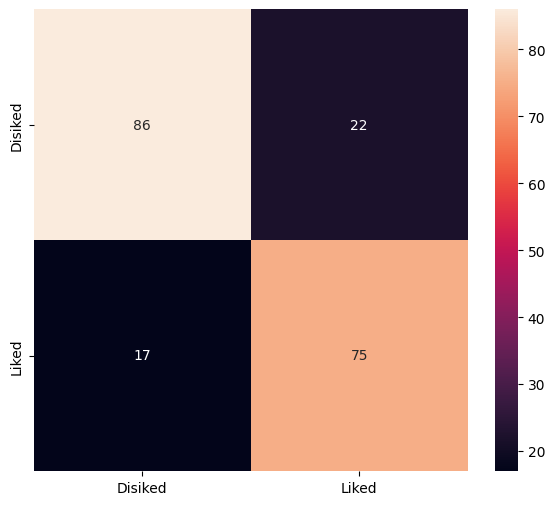

Decision Tree Accuracy: 80.5%


Classification Report:

              precision    recall  f1-score   support

     Disiked       0.83      0.80      0.82       108
       Liked       0.77      0.82      0.79        92

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



In [9]:
# Predict the values of the test set with the trained model
y_pred_test = model.predict(X_test)
# Creating and plotting the confusion matrix as a seaborn heatmap
labels = ['Disiked', 'Liked']
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=labels, yticklabels=labels)
plt.show()
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.3}%')
print("\n\nClassification Report:\n")
print(classification_report(y_test, y_pred_test, labels=[i for i in range(0, 2)], target_names=labels))